# Financial Analysis Crisis and Prediction

# Import Libraries

In [1]:
import numpy as np 
import pandas as pd

import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

# Load Dataset

In [3]:
data = pd.read_csv(r"C:\Users\Raksha Chavan\Downloads\african_crises.csv")
data.head()

case  cc3  country  year  systemic_crisis  exch_usd  \
0     1  DZA  Algeria  1870                1  0.052264   
1     1  DZA  Algeria  1871                0  0.052798   
2     1  DZA  Algeria  1872                0  0.052274   
3     1  DZA  Algeria  1873                0  0.051680   
4     1  DZA  Algeria  1874                0  0.051308   

   domestic_debt_in_default  sovereign_external_debt_default  \
0                         0                                0   
1                         0                                0   
2                         0                                0   
3                         0                                0   
4                         0                                0   

   gdp_weighted_default  inflation_annual_cpi  independence  currency_crises  \
0                   0.0              3.441456             0                0   
1                   0.0             14.149140             0                0   
2                   0.0             -3.718593             0                0   
3                   0.0             11.203897             0                0   
4                   0.0             -3.848561             0                0   

   inflation_crises banking_crisis  
0                 0         crisis  
1                 0      no_crisis  
2                 0      no_crisis  
3                 0      no_crisis  
4                 0      no_crisis

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1059 entries, 0 to 1058
Data columns (total 14 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   case                             1059 non-null   int64  
 1   cc3                              1059 non-null   object 
 2   country                          1059 non-null   object 
 3   year                             1059 non-null   int64  
 4   systemic_crisis                  1059 non-null   int64  
 5   exch_usd                         1059 non-null   float64
 6   domestic_debt_in_default         1059 non-null   int64  
 7   sovereign_external_debt_default  1059 non-null   int64  
 8   gdp_weighted_default             1059 non-null   float64
 9   inflation_annual_cpi             1059 non-null   float64
 10  independence                     1059 non-null   int64  
 11  currency_crises                  1059 non-null   int64  
 12  inflation_crises    

In [8]:
data.shape

(1059, 14)

In [10]:
data.isna().sum()

case                               0
cc3                                0
country                            0
year                               0
systemic_crisis                    0
exch_usd                           0
domestic_debt_in_default           0
sovereign_external_debt_default    0
gdp_weighted_default               0
inflation_annual_cpi               0
independence                       0
currency_crises                    0
inflation_crises                   0
banking_crisis                     0
dtype: int64

In [12]:
data.describe()

case         year  systemic_crisis     exch_usd  \
count  1059.000000  1059.000000      1059.000000  1059.000000   
mean     35.613787  1967.767705         0.077432    43.140831   
std      23.692402    33.530632         0.267401   111.475380   
min       1.000000  1860.000000         0.000000     0.000000   
25%      15.000000  1951.000000         0.000000     0.195350   
50%      38.000000  1973.000000         0.000000     0.868400   
75%      56.000000  1994.000000         0.000000     8.462750   
max      70.000000  2014.000000         1.000000   744.306139   

       domestic_debt_in_default  sovereign_external_debt_default  \
count               1059.000000                      1059.000000   
mean                   0.039660                         0.152975   
std                    0.195251                         0.360133   
min                    0.000000                         0.000000   
25%                    0.000000                         0.000000   
50%                    0.000000                         0.000000   
75%                    0.000000                         0.000000   
max                    1.000000                         1.000000   

       gdp_weighted_default  inflation_annual_cpi  independence  \
count           1059.000000          1.059000e+03   1059.000000   
mean               0.006402          2.084889e+04      0.776204   
std                0.043572          6.757274e+05      0.416984   
min                0.000000         -2.850214e+01      0.000000   
25%                0.000000          2.086162e+00      1.000000   
50%                0.000000          5.762330e+00      1.000000   
75%                0.000000          1.164405e+01      1.000000   
max                0.400000          2.198970e+07      1.000000   

       currency_crises  inflation_crises  
count      1059.000000       1059.000000  
mean          0.132200          0.129367  
std           0.349847          0.335765  
min           0.000000          0.000000  
25%           0.000000          0.000000  
50%           0.000000          0.000000  
75%           0.000000          0.000000  
max           2.000000          1.000000

In [14]:
# Drop non-numeric columns
df = data.select_dtypes(include=[float, int])


In [16]:
df.corr()

case      year  systemic_crisis  \
case                             1.000000  0.115574         0.010991   
year                             0.115574  1.000000         0.197450   
systemic_crisis                  0.010991  0.197450         1.000000   
exch_usd                        -0.231976  0.248757         0.202687   
domestic_debt_in_default         0.128358  0.136828         0.122158   
sovereign_external_debt_default -0.039262  0.271890         0.249850   
gdp_weighted_default            -0.032981 -0.054670         0.005274   
inflation_annual_cpi             0.044762  0.037035         0.106452   
independence                     0.021858  0.407360         0.147083   
currency_crises                  0.095339  0.189390         0.112751   
inflation_crises                 0.006405  0.098630         0.172562   

                                 exch_usd  domestic_debt_in_default  \
case                            -0.231976                  0.128358   
year                             0.248757                  0.136828   
systemic_crisis                  0.202687                  0.122158   
exch_usd                         1.000000                  0.005253   
domestic_debt_in_default         0.005253                  1.000000   
sovereign_external_debt_default  0.422890                  0.464751   
gdp_weighted_default            -0.040726                 -0.029874   
inflation_annual_cpi            -0.011947                  0.151832   
independence                     0.126034                  0.109120   
currency_crises                 -0.056472                  0.227585   
inflation_crises                -0.063783                  0.224429   

                                 sovereign_external_debt_default  \
case                                                   -0.039262   
year                                                    0.271890   
systemic_crisis                                         0.249850   
exch_usd                                                0.422890   
domestic_debt_in_default                                0.464751   
sovereign_external_debt_default                         1.000000   
gdp_weighted_default                                    0.345919   
inflation_annual_cpi                                    0.072609   
independence                                            0.228192   
currency_crises                                         0.199428   
inflation_crises                                        0.187930   

                                 gdp_weighted_default  inflation_annual_cpi  \
case                                        -0.032981              0.044762   
year                                        -0.054670              0.037035   
systemic_crisis                              0.005274              0.106452   
exch_usd                                    -0.040726             -0.011947   
domestic_debt_in_default                    -0.029874              0.151832   
sovereign_external_debt_default              0.345919              0.072609   
gdp_weighted_default                         1.000000             -0.004535   
inflation_annual_cpi                        -0.004535              1.000000   
independence                                 0.078936              0.016569   
currency_crises                              0.016970              0.076590   
inflation_crises                             0.017630              0.080060   

                                 independence  currency_crises  \
case                                 0.021858         0.095339   
year                                 0.407360         0.189390   
systemic_crisis                      0.147083         0.112751   
exch_usd                             0.126034        -0.056472   
domestic_debt_in_default             0.109120         0.227585   
sovereign_external_debt_default      0.228192         0.199428   
gdp_weighted_default                 0.078936         0.016970   
inflation_annual_cpi     

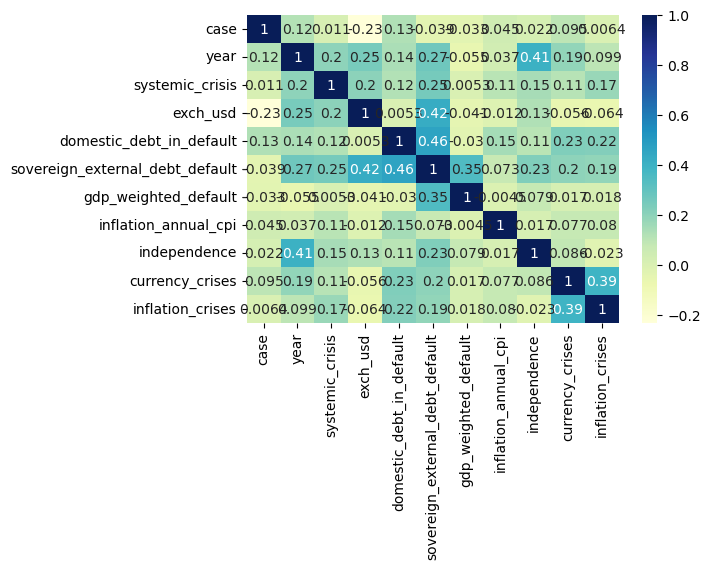

In [20]:
plt.figure(figsize=(6,4))
sns.heatmap(df.corr(),annot=True,cmap="YlGnBu")
plt.show()

#Distribution of Crisis Types Over Time
#Use a line plot or bar chart to visualize the frequency of each crisis type over time

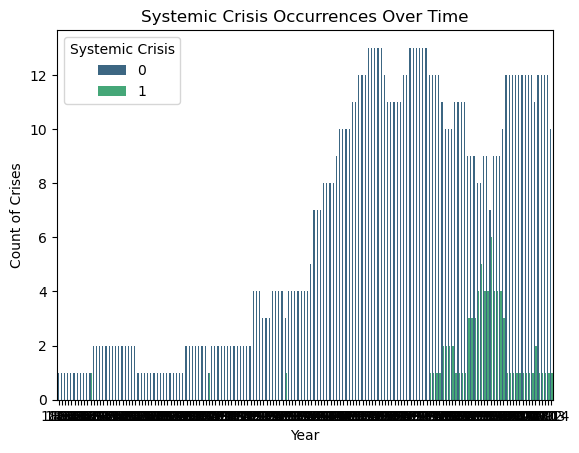

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

#Count of each crisis type by year
sns.countplot(data=df, x='year', hue='systemic_crisis', palette='viridis')
plt.title("Systemic Crisis Occurrences Over Time")
plt.xlabel("Year")
plt.ylabel("Count of Crises")
plt.legend(title="Systemic Crisis")
plt.show()


#Heatmap of Crisis Types by Country
#Created a heatmap to show the intensity or frequency of each crisis type by country. This is especially helpful if your dataset includes country codes or names.

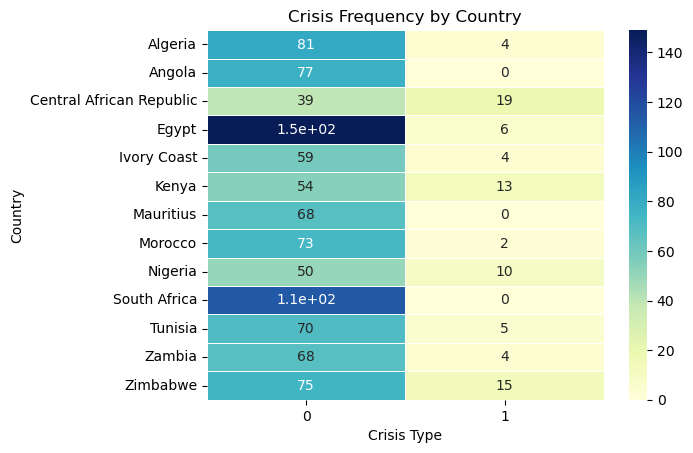

In [21]:
# Example: Heatmap of crisis frequency by country
crisis_counts = data.groupby(['country', 'systemic_crisis']).size().unstack().fillna(0)
sns.heatmap(crisis_counts, annot=True, cmap="YlGnBu", linewidths=0.5)
plt.title("Crisis Frequency by Country")
plt.xlabel("Crisis Type")
plt.ylabel("Country")
plt.show()


 - Egypt has the highest crisis frequency at 150, followed by South Africa with 110.
 - Algeria and Angola show significant frequencies at 81 and 77, respectively.
 - Other countries like Mauritius, Ivory Coast, Morocco, and Zambia report moderate crisis frequencies ranging from 54 to 73.

#Correlation Matrix of Financial Indicators
#Used a correlation heatmap to find relationships between economic indicators, such as inflation, debt defaults, and GDP changes, which could be associated with crises.

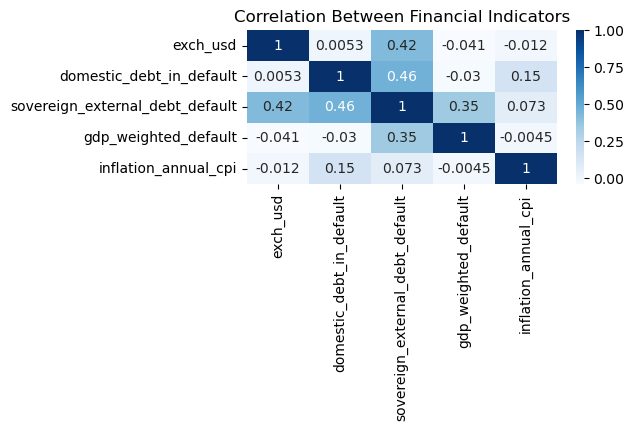

In [28]:
#import seaborn as sns

# Compute correlation matrix
correlation_matrix = df[['exch_usd', 'domestic_debt_in_default', 'sovereign_external_debt_default', 
                         'gdp_weighted_default', 'inflation_annual_cpi']].corr()

# Plot the heatmap
plt.figure(figsize=(5, 2))
sns.heatmap(correlation_matrix, annot=True, cmap="Blues")
plt.title("Correlation Between Financial Indicators")
plt.show()


#GDP and Inflation Trends Before and During Crises
#Use a line plot to show the changes in GDP and inflation rates in years leading up to and during crises. This can reveal economic patterns that precede crises.

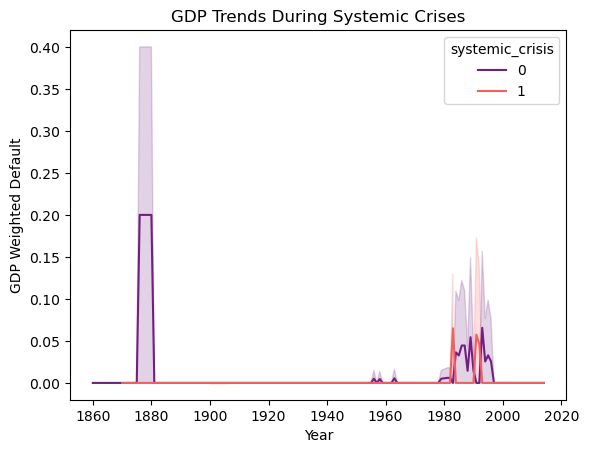

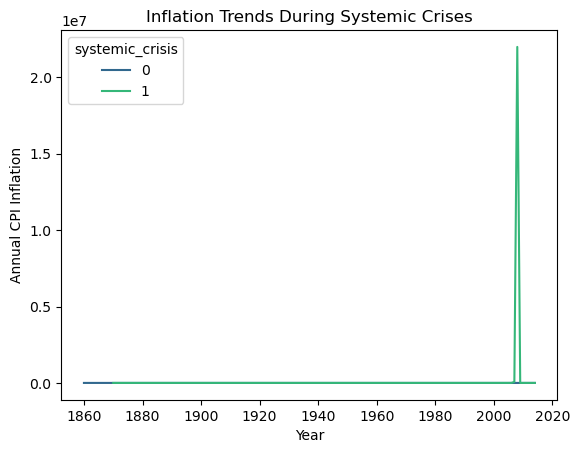

In [25]:
# Example: Line plot for GDP and Inflation trends
sns.lineplot(data=df, x='year', y='gdp_weighted_default', hue='systemic_crisis', palette='magma')
plt.title("GDP Trends During Systemic Crises")
plt.xlabel("Year")
plt.ylabel("GDP Weighted Default")
plt.show()

sns.lineplot(data=df, x='year', y='inflation_annual_cpi', hue='systemic_crisis', palette='viridis')
plt.title("Inflation Trends During Systemic Crises")
plt.xlabel("Year")
plt.ylabel("Annual CPI Inflation")
plt.show()


#Box Plot of Financial Indicators by Crisis Status
#A box plot can be used to compare distributions of financial indicators for years with and without crises, helping to highlight anomalies or extreme values.

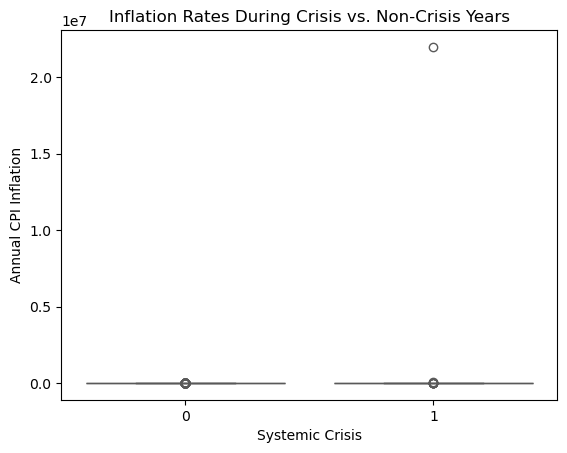

In [27]:
# Boxplot of inflation during crisis vs. no crisis years
sns.boxplot(data=df, x='systemic_crisis', y='inflation_annual_cpi', palette="Set2")
plt.title("Inflation Rates During Crisis vs. Non-Crisis Years")
plt.xlabel("Systemic Crisis")
plt.ylabel("Annual CPI Inflation")
plt.show()


 - The plot suggests that inflation rates remain low across both systemic crisis and non-crisis years, with only rare instances of elevated inflation

#6. Geographic Distribution of Crises
#If the dataset includes geographic data, a choropleth map can visually display where crises are most frequent or severe.

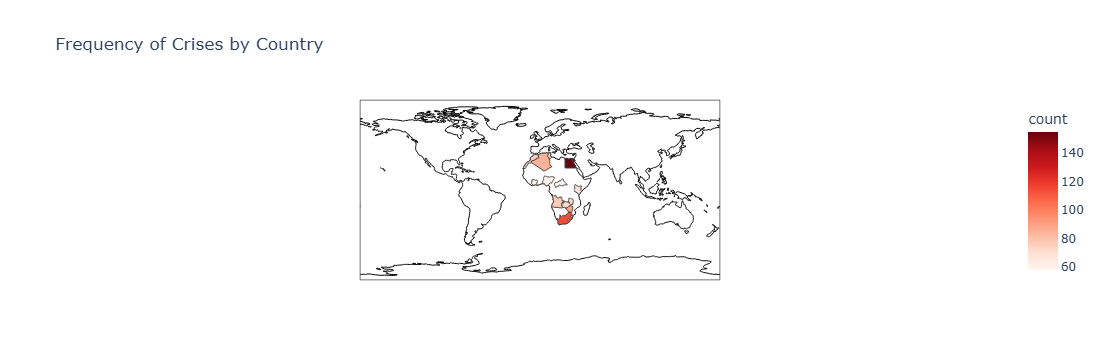

In [29]:
import plotly.express as px

# Create a map to show the count of crises by country
crisis_map = data['country'].value_counts().reset_index()
crisis_map.columns = ['country', 'count']

fig = px.choropleth(crisis_map, locations='country', locationmode="country names",
                    color='count', color_continuous_scale="Reds",
                    title="Frequency of Crises by Country")
fig.update_geos(showcoastlines=True, coastlinecolor="Black", showland=True, landcolor="white")
fig.show()


#7. Cluster Analysis of Economic Indicators During Crises
#Using a scatter plot with clusters, you can group economic indicators to see if certain countries or years share common patterns during crises.

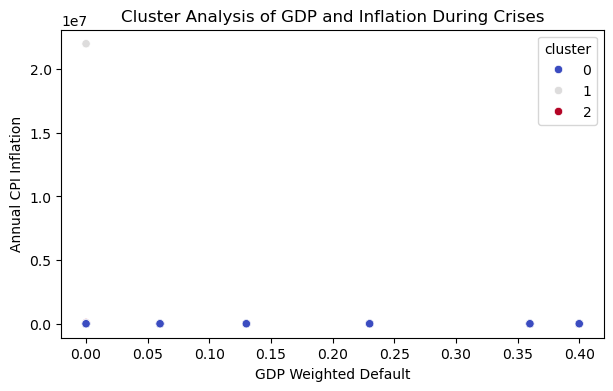

In [31]:
from sklearn.cluster import KMeans
import numpy as np

# Select features for clustering
features = df[['exch_usd', 'gdp_weighted_default', 'inflation_annual_cpi']]
kmeans = KMeans(n_clusters=3)
df['cluster'] = kmeans.fit_predict(features)

# Visualize the clusters
plt.figure(figsize=(7, 4))
sns.scatterplot(data=df, x='gdp_weighted_default', y='inflation_annual_cpi', hue='cluster', palette="coolwarm")
plt.title("Cluster Analysis of GDP and Inflation During Crises")
plt.xlabel("GDP Weighted Default")
plt.ylabel("Annual CPI Inflation")
plt.show()


 - The majority of points (Cluster 0) suggest a strong relationship where low GDP Weighted Default corresponds to minimal inflation.
 - Clusters 1 and 2 show isolated cases that deviate from the main clustering pattern.

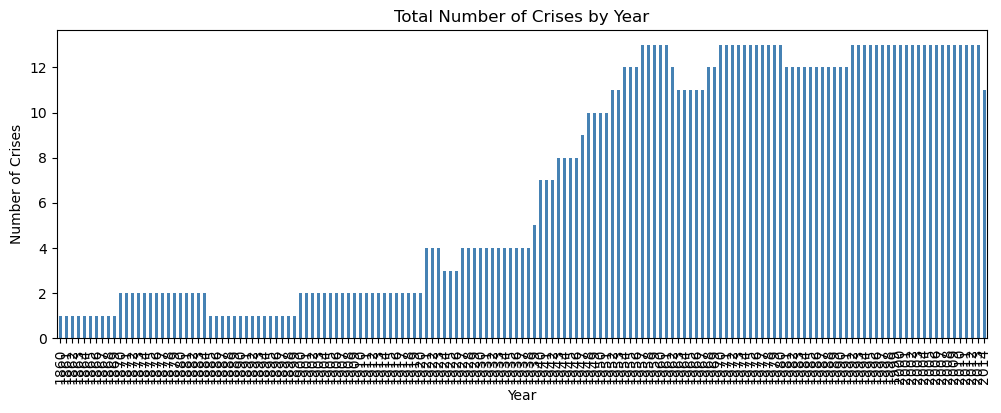

In [33]:
# Bar plot for crisis count per year
crisis_count = df.groupby('year').size()
crisis_count.plot(kind='bar', color='steelblue', figsize=(12,4))
plt.title("Total Number of Crises by Year")
plt.xlabel("Year")
plt.ylabel("Number of Crises")
plt.show()


In [35]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for col in data.columns:
    if data[col].dtype=='object':
        data[col]=le.fit_transform(data[col])

In [37]:
x=df.drop('inflation_crises',axis=1)
y=df['inflation_crises']

In [39]:
from imblearn.over_sampling import RandomOverSampler
oversample=RandomOverSampler(sampling_strategy=0.15)
x_over,y_over=oversample.fit_resample(x,y)
print(x_over)
print(y_over)

      case  year  systemic_crisis    exch_usd  domestic_debt_in_default  \
0        1  1870                1    0.052264                         0   
1        1  1871                0    0.052798                         0   
2        1  1872                0    0.052274                         0   
3        1  1873                0    0.051680                         0   
4        1  1874                0    0.051308                         0   
...    ...   ...              ...         ...                       ...   
1055    70  2010                0  378.200000                         1   
1056    70  2011                0  361.900000                         1   
1057    70  2012                0  361.900000                         1   
1058    70  2013                0  361.900000                         1   
1059    56  1920                0    0.253200                         0   

      sovereign_external_debt_default  gdp_weighted_default  \
0                                   

In [41]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_over,y_over,test_size=0.30,random_state=42)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((742, 11), (318, 11), (742,), (318,))

In [43]:
from sklearn.preprocessing import MinMaxScaler
mmscaler=MinMaxScaler(feature_range=(0,1))
x_train=mmscaler.fit_transform(x_train)
x_test=mmscaler.fit_transform(x_test)
x_train=pd.DataFrame(x_train)
x_test=pd.DataFrame(x_test)

In [45]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
import lightgbm as lgb
from sklearn.naive_bayes import GaussianNB

In [121]:
import sklearn
print(sklearn.__version__)


1.4.2


Model Name:  LogisticRegression()
Confusion matrix : 
 [[ 17  16]
 [ 16 269]]
Outcome values : 
 17 16 16 269
Classification report : 
               precision    recall  f1-score   support

           1       0.52      0.52      0.52        33
           0       0.94      0.94      0.94       285

    accuracy                           0.90       318
   macro avg       0.73      0.73      0.73       318
weighted avg       0.90      0.90      0.90       318

Accuracy : 89.9 %
Precision : 51.5 %
Recall : 51.5 %
F1 Score : 0.515
Specificity or True Negative Rate : 94.4 %
Balanced Accuracy : 73.0 %
MCC : MCC
roc_auc_score: 0.73


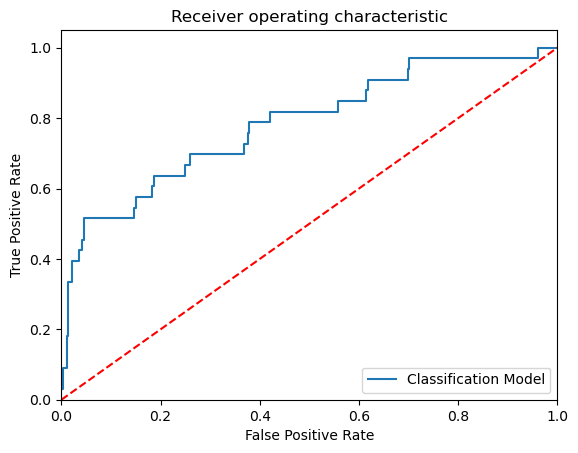

-----------------------------------------------------------------------------------------------------
Model Name:  DecisionTreeClassifier()
Confusion matrix : 
 [[ 33   0]
 [284   1]]
Outcome values : 
 33 0 284 1
Classification report : 
               precision    recall  f1-score   support

           1       0.10      1.00      0.19        33
           0       1.00      0.00      0.01       285

    accuracy                           0.11       318
   macro avg       0.55      0.50      0.10       318
weighted avg       0.91      0.11      0.03       318

Accuracy : 10.7 %
Precision : 10.4 %
Recall : 100.0 %
F1 Score : 0.189
Specificity or True Negative Rate : 0.4 %
Balanced Accuracy : 50.2 %
MCC : MCC
roc_auc_score: 0.502


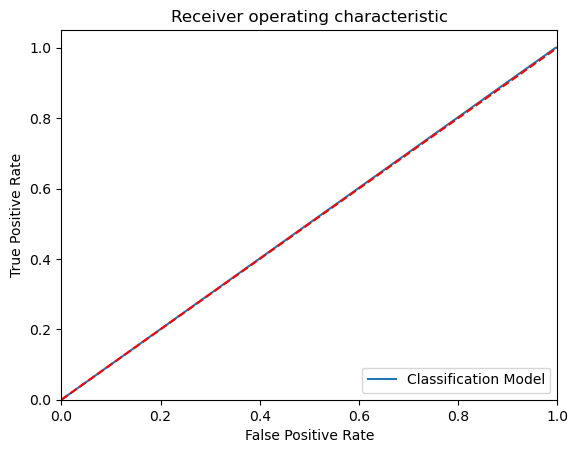

-----------------------------------------------------------------------------------------------------
Model Name:  RandomForestClassifier()
Confusion matrix : 
 [[ 33   0]
 [284   1]]
Outcome values : 
 33 0 284 1
Classification report : 
               precision    recall  f1-score   support

           1       0.10      1.00      0.19        33
           0       1.00      0.00      0.01       285

    accuracy                           0.11       318
   macro avg       0.55      0.50      0.10       318
weighted avg       0.91      0.11      0.03       318

Accuracy : 10.7 %
Precision : 10.4 %
Recall : 100.0 %
F1 Score : 0.189
Specificity or True Negative Rate : 0.4 %
Balanced Accuracy : 50.2 %
MCC : MCC
roc_auc_score: 0.502


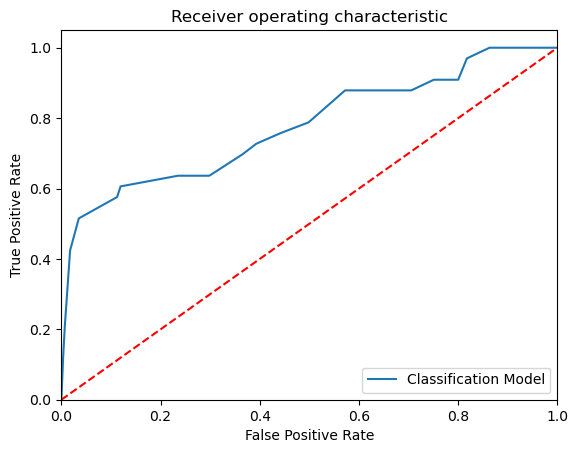

-----------------------------------------------------------------------------------------------------
Model Name:  ExtraTreesClassifier()
Confusion matrix : 
 [[ 33   0]
 [280   5]]
Outcome values : 
 33 0 280 5
Classification report : 
               precision    recall  f1-score   support

           1       0.11      1.00      0.19        33
           0       1.00      0.02      0.03       285

    accuracy                           0.12       318
   macro avg       0.55      0.51      0.11       318
weighted avg       0.91      0.12      0.05       318

Accuracy : 11.9 %
Precision : 10.5 %
Recall : 100.0 %
F1 Score : 0.191
Specificity or True Negative Rate : 1.8 %
Balanced Accuracy : 50.9 %
MCC : MCC
roc_auc_score: 0.509


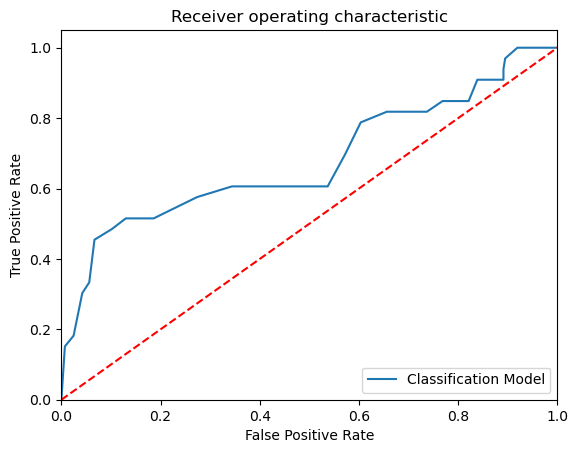

-----------------------------------------------------------------------------------------------------
Model Name:  KNeighborsClassifier()
Confusion matrix : 
 [[ 11  22]
 [ 12 273]]
Outcome values : 
 11 22 12 273
Classification report : 
               precision    recall  f1-score   support

           1       0.48      0.33      0.39        33
           0       0.93      0.96      0.94       285

    accuracy                           0.89       318
   macro avg       0.70      0.65      0.67       318
weighted avg       0.88      0.89      0.88       318

Accuracy : 89.3 %
Precision : 47.8 %
Recall : 33.3 %
F1 Score : 0.393
Specificity or True Negative Rate : 95.8 %
Balanced Accuracy : 64.6 %
MCC : MCC
roc_auc_score: 0.646


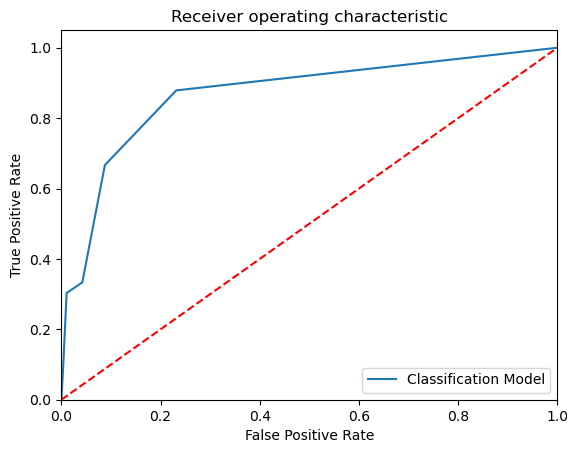

-----------------------------------------------------------------------------------------------------
Model Name:  SVC(probability=True)
Confusion matrix : 
 [[ 10  23]
 [  2 283]]
Outcome values : 
 10 23 2 283
Classification report : 
               precision    recall  f1-score   support

           1       0.83      0.30      0.44        33
           0       0.92      0.99      0.96       285

    accuracy                           0.92       318
   macro avg       0.88      0.65      0.70       318
weighted avg       0.92      0.92      0.90       318

Accuracy : 92.1 %
Precision : 83.3 %
Recall : 30.3 %
F1 Score : 0.444
Specificity or True Negative Rate : 99.3 %
Balanced Accuracy : 64.8 %
MCC : MCC
roc_auc_score: 0.648


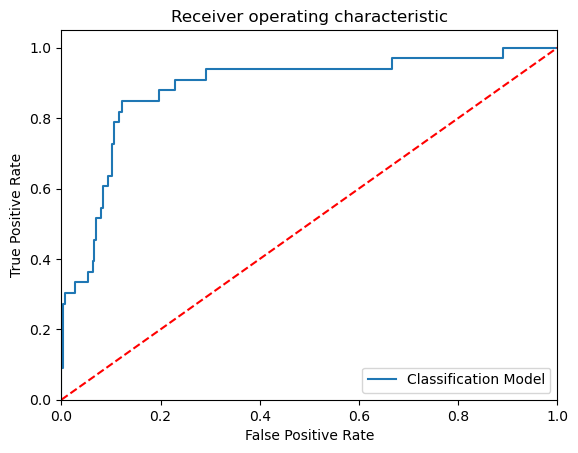

-----------------------------------------------------------------------------------------------------


InvalidParameterError: The 'loss' parameter of GradientBoostingClassifier must be a str among {'log_loss', 'exponential'}. Got 'deviance' instead.

In [47]:
ModelLR = LogisticRegression()
ModelDC = DecisionTreeClassifier()
ModelRF = RandomForestClassifier()
ModelET = ExtraTreesClassifier()
ModelKNN = KNeighborsClassifier(n_neighbors=5)
ModelSVM = SVC(probability=True)
#modelBAG = BaggingClassifier(base_estimator=None, n_estimators=100, max_samples=1.0, max_features=1.0,bootstrap=True, bootstrap_features=False, oob_score=False, warm_start=False,n_jobs=None, random_state=None, verbose=0)
ModelGB = GradientBoostingClassifier(loss='deviance', learning_rate=0.1,n_estimators=100, subsample=1.0,criterion='friedman_mse', min_samples_split=2, min_samples_leaf=1,min_weight_fraction_leaf=0.0, max_depth=3, min_impurity_decrease=0.0, init=None,random_state=None,max_features=None, verbose=0, max_leaf_nodes=None, warm_start=False,validation_fraction=0.1, n_iter_no_change=None, tol=0.0001, ccp_alpha=0.0)
ModelLGB = lgb.LGBMClassifier()
ModelGNB = GaussianNB()

 
MM = [ModelLR, ModelDC, ModelRF, ModelET,ModelKNN, ModelSVM,ModelGB, ModelLGB, ModelGNB]
for models in MM:
    # Fit the model
    
    models.fit(x_train, y_train)
    
    # Prediction
    
    y_pred = models.predict(x_test)
    y_pred_prob = models.predict_proba(x_test)

    # Print the model name
    
    print('Model Name: ', models)
    
    # confusion matrix in sklearn

    from sklearn.metrics import confusion_matrix
    from sklearn.metrics import classification_report

    # actual values

    actual = y_test

    # predicted values

    predicted = y_pred

    # confusion matrix

    matrix = confusion_matrix(actual,predicted, labels=[1,0],sample_weight=None, normalize=None)
    print('Confusion matrix : \n', matrix)

    # outcome values order in sklearn

    tp, fn, fp, tn = confusion_matrix(actual,predicted,labels=[1,0]).reshape(-1)
    print('Outcome values : \n', tp, fn, fp, tn)

    # classification report for precision, recall f1-score and accuracy

    C_Report = classification_report(actual,predicted,labels=[1,0])

    print('Classification report : \n', C_Report)

    # calculating the metrics

    sensitivity = round(tp/(tp+fn), 3);
    specificity = round(tn/(tn+fp), 3);
    accuracy = round((tp+tn)/(tp+fp+tn+fn), 3);
    balanced_accuracy = round((sensitivity+specificity)/2, 3);

    precision = round(tp/(tp+fp), 3);
    f1Score = round((2*tp/(2*tp + fp + fn)), 3);

    # Matthews Correlation Coefficient (MCC). Range of values of MCC lie between -1 to +1. 
    # A model with a score of +1 is a perfect model and -1 is a poor model
    import math
    from math import sqrt

    mx = (tp+fp) * (tp+fn) * (tn+fp) * (tn+fn)
    MCC = round(((tp * tn) - (fp * fn)) / sqrt(mx), 3)

    print('Accuracy :', round(accuracy*100, 2),'%')
    print('Precision :', round(precision*100, 2),'%')
    print('Recall :', round(sensitivity*100,2), '%')
    print('F1 Score :', f1Score)
    print('Specificity or True Negative Rate :', round(specificity*100,2), '%'  )
    print('Balanced Accuracy :', round(balanced_accuracy*100, 2),'%')
    print('MCC :', 'MCC')

    # Area under ROC curve 

    from sklearn.metrics import roc_curve, roc_auc_score

    print('roc_auc_score:', round(roc_auc_score(actual, predicted), 3))
    
    # ROC Curve
    
    from sklearn.metrics import roc_auc_score
    from sklearn.metrics import roc_curve
    logit_roc_auc = roc_auc_score(actual, predicted)
    fpr, tpr, thresholds = roc_curve(actual, models.predict_proba(x_test)[:,1])
    plt.figure()
    # plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
    plt.plot(fpr, tpr, label= 'Classification Model' % logit_roc_auc)
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.savefig('Log_ROC')
    plt.show()
    print('-----------------------------------------------------------------------------------------------------')
    #----------------------------------------------------------------------------------------------------------
    new_row = {'Model Name' : models,
               'True Positive' : tp, 
               'False Negative' : fn, 
               'False Positive' : fp,
               'True Negative' : tn,
               'Accuracy' : accuracy,
               'Precision' : precision,
               'Recall' : sensitivity,
               'F1 Score' : f1Score,
               'Specificity' : specificity,
               'MCC':MCC,
               'ROC_AUC_Score':roc_auc_score(actual, predicted),
               'Balanced Accuracy':balanced_accuracy}
    #result = result.append(new_row, ignore_index=True)


    

In [51]:
predictions = ModelLR.predict(x_test)


In [53]:
#import pandas as pd
comparison_df = pd.DataFrame({'Actual': y_test, 'Predicted': predictions})


In [55]:
print(comparison_df.head())


      Actual  Predicted
972        0          0
312        0          0
70         0          0
1028       1          1
1021       0          0


In [57]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

mse = mean_squared_error(y_test, predictions)
mae = mean_absolute_error(y_test, predictions)
print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")


Mean Squared Error: 0.10062893081761007
Mean Absolute Error: 0.10062893081761007


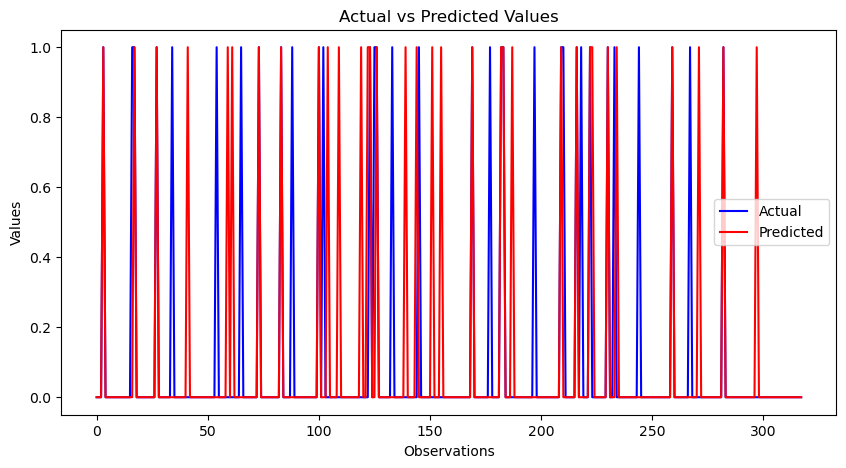

In [59]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(y_test.values, label='Actual', color='b')
plt.plot(predictions, label='Predicted', color='r')
plt.xlabel('Observations')
plt.ylabel('Values')
plt.title('Actual vs Predicted Values')
plt.legend()
plt.show()
